# چیلنج: ڈیٹا سائنس کے بارے میں متن کا تجزیہ

اس مثال میں، آئیے ایک سادہ مشق کریں جو روایتی ڈیٹا سائنس کے عمل کے تمام مراحل کا احاطہ کرتی ہے۔ آپ کو کوئی کوڈ لکھنے کی ضرورت نہیں ہے، آپ صرف نیچے دیے گئے سیلز پر کلک کر کے انہیں چلا سکتے ہیں اور نتیجہ دیکھ سکتے ہیں۔ ایک چیلنج کے طور پر، آپ کو ترغیب دی جاتی ہے کہ اس کوڈ کو مختلف ڈیٹا کے ساتھ آزما کر دیکھیں۔

## مقصد

اس سبق میں، ہم نے ڈیٹا سائنس سے متعلق مختلف تصورات پر بات کی ہے۔ آئیے کچھ مزید متعلقہ تصورات دریافت کرنے کی کوشش کریں **ٹیکسٹ مائننگ** کے ذریعے۔ ہم ڈیٹا سائنس کے بارے میں ایک متن سے شروع کریں گے، اس سے کلیدی الفاظ نکالیں گے، اور پھر نتیجہ کو بصری طور پر پیش کرنے کی کوشش کریں گے۔

بطور متن، میں ڈیٹا سائنس کے بارے میں ویکیپیڈیا کے صفحے کا استعمال کروں گا:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## مرحلہ 1: ڈیٹا حاصل کرنا

ہر ڈیٹا سائنس کے عمل کا پہلا مرحلہ ڈیٹا حاصل کرنا ہوتا ہے۔ ہم اس کے لیے `requests` لائبریری استعمال کریں گے:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## مرحلہ 2: ڈیٹا کو تبدیل کرنا

اگلا مرحلہ ڈیٹا کو ایسی شکل میں تبدیل کرنا ہے جو پراسیسنگ کے لیے موزوں ہو۔ ہمارے معاملے میں، ہم نے صفحے سے HTML سورس کوڈ ڈاؤنلوڈ کیا ہے، اور ہمیں اسے سادہ متن میں تبدیل کرنا ہوگا۔

یہ کام کرنے کے کئی طریقے ہیں۔ ہم Python کے سب سے آسان بلٹ ان [HTMLParser](https://docs.python.org/3/library/html.parser.html) آبجیکٹ کا استعمال کریں گے۔ ہمیں `HTMLParser` کلاس کو سب کلاس کرنا ہوگا اور ایسا کوڈ لکھنا ہوگا جو HTML ٹیگز کے اندر موجود تمام متن کو جمع کرے، سوائے `<script>` اور `<style>` ٹیگز کے۔


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## مرحلہ 3: بصیرت حاصل کرنا

سب سے اہم مرحلہ یہ ہے کہ اپنے ڈیٹا کو کسی ایسی شکل میں تبدیل کریں جس سے ہم بصیرت حاصل کر سکیں۔ ہمارے معاملے میں، ہم متن سے کلیدی الفاظ نکالنا چاہتے ہیں اور دیکھنا چاہتے ہیں کہ کون سے کلیدی الفاظ زیادہ معنی خیز ہیں۔

ہم کلیدی الفاظ نکالنے کے لیے Python کی ایک لائبریری [RAKE](https://github.com/aneesha/RAKE) استعمال کریں گے۔ سب سے پہلے، اگر یہ لائبریری موجود نہ ہو تو اسے انسٹال کرتے ہیں:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


`Rake` کی مرکزی فعالیت دستیاب ہے، جسے ہم کچھ پیرامیٹرز کا استعمال کرتے ہوئے حسب ضرورت بنا سکتے ہیں۔ ہمارے معاملے میں، ہم ایک کلیدی لفظ کی کم از کم لمبائی 5 حروف، دستاویز میں ایک کلیدی لفظ کی کم از کم تکرار 3، اور ایک کلیدی لفظ میں زیادہ سے زیادہ الفاظ کی تعداد 2 مقرر کریں گے۔ دیگر قدروں کے ساتھ تجربہ کرنے اور نتیجہ دیکھنے کے لیے آزاد محسوس کریں۔


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

ہم نے ایک فہرست حاصل کی ہے جس میں شرائط اور ان کے ساتھ اہمیت کی ڈگری شامل ہے۔ جیسا کہ آپ دیکھ سکتے ہیں، سب سے متعلقہ شعبے، جیسے مشین لرننگ اور بڑا ڈیٹا، فہرست میں اوپر کی پوزیشنز پر موجود ہیں۔

## مرحلہ 4: نتیجہ کو بصری طور پر دیکھنا

لوگ ڈیٹا کو بصری شکل میں سب سے بہتر سمجھ سکتے ہیں۔ اس لیے اکثر ڈیٹا کو بصری طور پر پیش کرنا معنی خیز ہوتا ہے تاکہ کچھ بصیرت حاصل کی جا سکے۔ ہم Python میں `matplotlib` لائبریری کا استعمال کر سکتے ہیں تاکہ کلیدی الفاظ کی سادہ تقسیم کو ان کی اہمیت کے ساتھ پیش کیا جا سکے۔


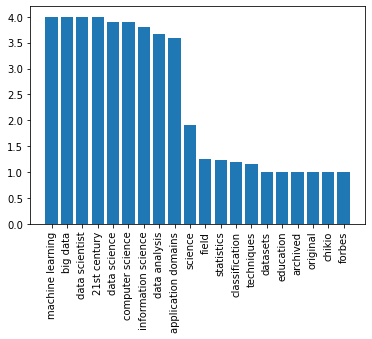

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

الفاظ کی تعدد کو دیکھنے کا ایک اور بہتر طریقہ موجود ہے - **ورڈ کلاؤڈ** کا استعمال کرتے ہوئے۔ ہمیں اپنی کلیدی الفاظ کی فہرست سے ورڈ کلاؤڈ بنانے کے لیے ایک اور لائبریری انسٹال کرنے کی ضرورت ہوگی۔


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` آبجیکٹ اصل متن یا پہلے سے حساب شدہ الفاظ کی فہرست ان کی فریکوئنسی کے ساتھ لینے کا ذمہ دار ہے، اور ایک تصویر واپس کرتا ہے، جسے پھر `matplotlib` کے ذریعے دکھایا جا سکتا ہے:


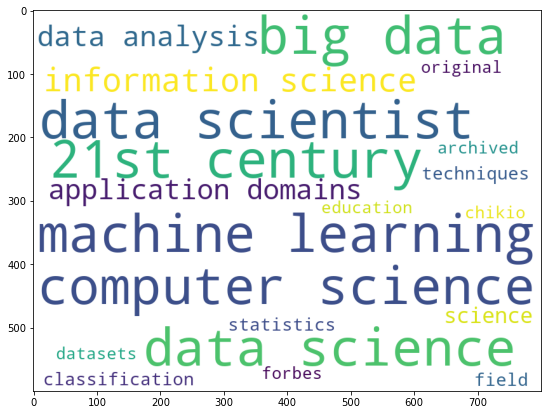

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

ہم اصل متن کو `WordCloud` میں بھی دے سکتے ہیں - آئیے دیکھتے ہیں کہ کیا ہم اسی طرح کا نتیجہ حاصل کر سکتے ہیں:


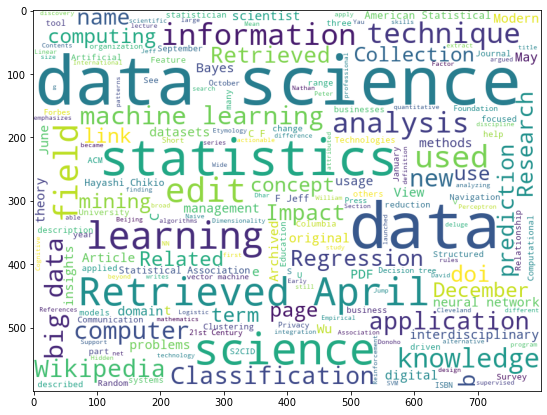

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

آپ دیکھ سکتے ہیں کہ لفظی بادل اب زیادہ متاثر کن لگتا ہے، لیکن اس میں بہت زیادہ شور بھی شامل ہے (مثال کے طور پر، غیر متعلقہ الفاظ جیسے `Retrieved on`)۔ اس کے علاوہ، ہمیں دو الفاظ پر مشتمل کم کلیدی الفاظ ملتے ہیں، جیسے *data scientist* یا *computer science*۔ اس کی وجہ یہ ہے کہ RAKE الگورتھم متن سے اچھے کلیدی الفاظ منتخب کرنے میں کہیں بہتر کام کرتا ہے۔ یہ مثال ڈیٹا کی پیشگی پروسیسنگ اور صفائی کی اہمیت کو واضح کرتی ہے، کیونکہ آخر میں واضح تصویر ہمیں بہتر فیصلے کرنے کی اجازت دے گی۔

اس مشق میں ہم نے ویکیپیڈیا کے متن سے کچھ مطلب نکالنے کے ایک سادہ عمل کو دیکھا، کلیدی الفاظ اور لفظی بادل کی شکل میں۔ یہ مثال کافی سادہ ہے، لیکن یہ ان تمام عام مراحل کو اچھی طرح سے ظاہر کرتی ہے جو ایک ڈیٹا سائنسدان ڈیٹا کے ساتھ کام کرتے وقت اختیار کرتا ہے، ڈیٹا کے حصول سے لے کر بصری نمائندگی تک۔

ہمارے کورس میں ہم ان تمام مراحل پر تفصیل سے بات کریں گے۔



---

**ڈسکلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا عدم درستگی ہو سکتی ہیں۔ اصل دستاویز، جو اس کی اصل زبان میں ہے، کو مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے لیے ہم ذمہ دار نہیں ہیں۔
